In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file 
covid_data =pd.read_excel(r'C:\Users\ASUS\Desktop\Machine Learning\ML assignment\Covid_Dataset_new.xlsx')
covid_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,Yes,male,Other,negative
1,0,0,0,0,0,No,male,Other,positive
2,0,0,0,0,0,Yes,female,Other,negative
3,1,0,0,0,0,No,male,Abroad,negative
4,0,0,0,0,0,Yes,male,Other,positive


In [3]:
# Check dtypes 
covid_data.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
age_60_and_above       object
gender                 object
test_indication        object
corona_result          object
dtype: object

In [4]:
covid_data.shape

(2137, 9)

# EDA 

In [5]:
def create_piechart(data, column):
    

    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()

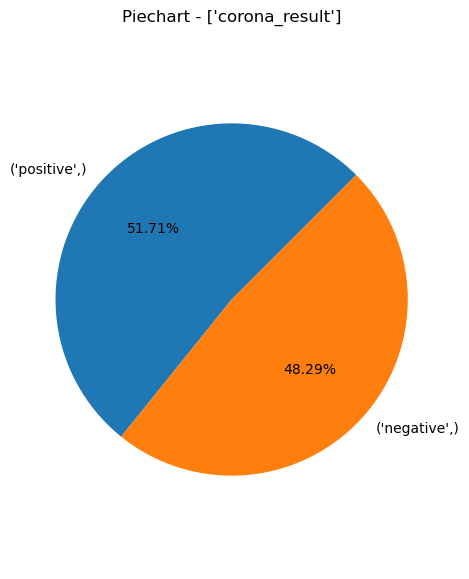

In [6]:
plt.figure(figsize=(5,7))
create_piechart(covid_data, ["corona_result"])


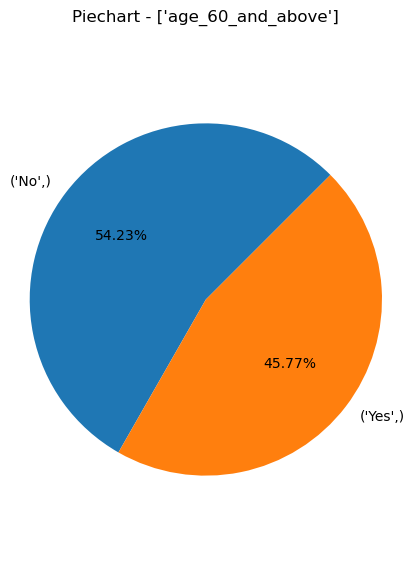

In [7]:
plt.figure(figsize=(5,7))
create_piechart(covid_data, ["age_60_and_above"])

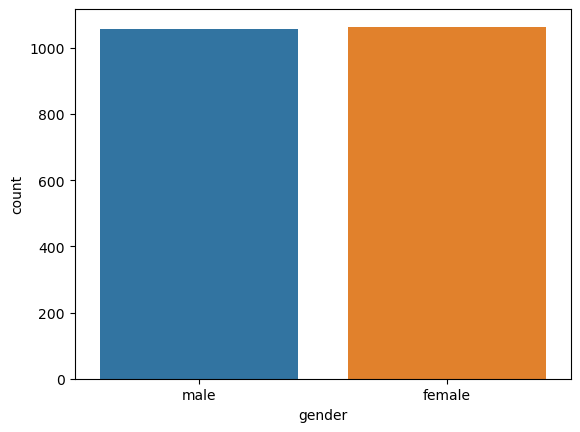

In [8]:
sns.countplot(x=covid_data["gender"])
plt.show()

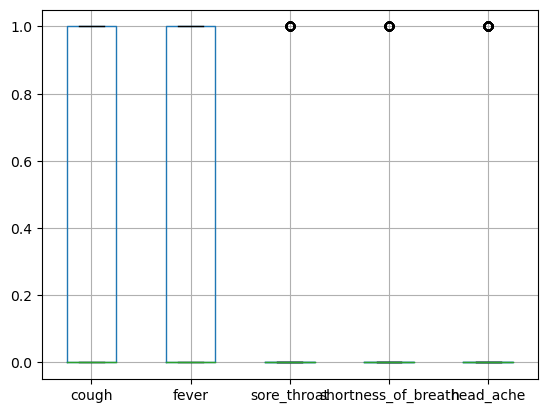

In [9]:
covid_data.boxplot() 
plt.show() 

In [10]:
# create a copy of a dataframe 
covid_df_rev = pd.DataFrame.copy(covid_data)
covid_df_rev.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,Yes,male,Other,negative
1,0,0,0,0,0,No,male,Other,positive
2,0,0,0,0,0,Yes,female,Other,negative
3,1,0,0,0,0,No,male,Abroad,negative
4,0,0,0,0,0,Yes,male,Other,positive


In [11]:
#covid_df_rev.duplicated().sum()

In [12]:
#covid_df_rev.drop_duplicates(inplace=True)
#covid_df_rev.shape

In [13]:
# Check null values 
covid_df_rev.isnull().sum()

cough                   0
fever                   0
sore_throat             0
shortness_of_breath     0
head_ache               0
age_60_and_above        0
gender                 16
test_indication         0
corona_result           0
dtype: int64

In [14]:
#covid_df_rev.dropna(inplace=True)

In [15]:
covid_df_rev.isnull().sum()

cough                   0
fever                   0
sore_throat             0
shortness_of_breath     0
head_ache               0
age_60_and_above        0
gender                 16
test_indication         0
corona_result           0
dtype: int64

In [16]:
covid_df_rev.shape

(2137, 9)

In [17]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

In [18]:
covid_df_rev=covid_df_rev.replace(['?'], np.nan)

In [19]:
missing_data(covid_df_rev)

,Total,Percent,Data_Type
gender,16,0.75,object
cough,0,0.00,int64
fever,0,0.00,int64
sore_throat,0,0.00,int64
shortness_of_breath,0,0.00,int64
head_ache,0,0.00,int64
age_60_and_above,0,0.00,object
test_indication,0,0.00,object
corona_result,0,0.00,object


<Axes: >

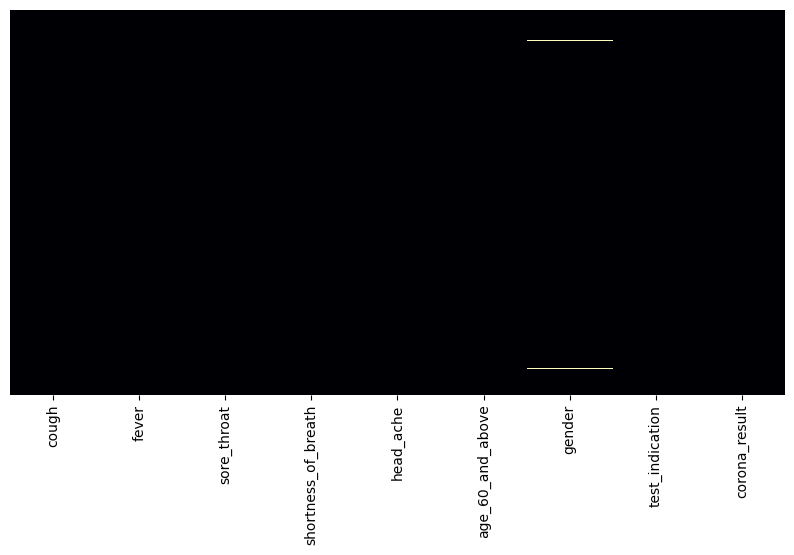

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(covid_df_rev.isnull(), 
            cbar = False, 
            yticklabels=False, 
            cmap="magma" )

In [21]:
covid_df_rev.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
age_60_and_above       object
gender                 object
test_indication        object
corona_result          object
dtype: object

In [22]:
# Dummy variables using pd.get_dummies()

In [23]:
# Create dummy variables 
covid_df_rev_new =pd.get_dummies(covid_df_rev,drop_first = True)
covid_df_rev_new .head()                                    ## drop_first = True---- first value delete hoga

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_Yes,gender_male,test_indication_Contact with confirmed,test_indication_Other,corona_result_positive
0,1,1,0,0,0,True,True,False,True,False
1,0,0,0,0,0,False,True,False,True,True
2,0,0,0,0,0,True,False,False,True,False
3,1,0,0,0,0,False,True,False,False,False
4,0,0,0,0,0,True,True,False,True,True


In [24]:
covid_df_rev_new.shape

(2137, 10)

In [25]:
covid_df_rev_new.dtypes

cough                                     int64
fever                                     int64
sore_throat                               int64
shortness_of_breath                       int64
head_ache                                 int64
age_60_and_above_Yes                       bool
gender_male                                bool
test_indication_Contact with confirmed     bool
test_indication_Other                      bool
corona_result_positive                     bool
dtype: object

# Lable Encoder

In [26]:
colname=[]
for x in covid_df_rev.columns:
    
    if covid_df_rev[x].dtype=='object':
        
        colname.append(x)
colname

['age_60_and_above', 'gender', 'test_indication', 'corona_result']

In [27]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    covid_df_rev[x]=le.fit_transform(covid_df_rev[x])
"""
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
"""

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [28]:
covid_df_rev.head()
    #0-- <=50k
    #1--  >50k

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,1,1,2,0
1,0,0,0,0,0,0,1,2,1
2,0,0,0,0,0,1,0,2,0
3,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,2,1


In [29]:
covid_df_rev.dtypes

cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
age_60_and_above       int32
gender                 int32
test_indication        int32
corona_result          int32
dtype: object

In [30]:
X= covid_df_rev.values[:,0:-1]   
Y= covid_df_rev.values[:,-1]

In [31]:
print(X)

[[1 1 0 ... 1 1 2]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 1 0 2]
 ...
 [0 0 0 ... 1 1 2]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 1 0 2]]


In [32]:
print(Y)

[0 1 0 ... 0 0 0]


In [33]:
print(X.shape)
print(Y.shape)

(2137, 8)
(2137,)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [35]:
print(X)

[[ 1.17574901  1.63071965 -0.19975654 ...  1.08860993  0.95286273
   0.73815524]
 [-0.85052166 -0.61322619 -0.19975654 ... -0.91860268  0.95286273
   0.73815524]
 [-0.85052166 -0.61322619 -0.19975654 ...  1.08860993 -0.99014076
   0.73815524]
 ...
 [-0.85052166 -0.61322619 -0.19975654 ...  1.08860993  0.95286273
   0.73815524]
 [-0.85052166 -0.61322619 -0.19975654 ... -0.91860268  0.95286273
   0.73815524]
 [-0.85052166 -0.61322619 -0.19975654 ...  1.08860993 -0.99014076
   0.73815524]]


# Running a basic modal

In [37]:
from sklearn.model_selection import train_test_split
#split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1495, 8)
(1495,)
(642, 8)
(642,)


In [39]:
from sklearn.linear_model import LogisticRegression
# create a modal
classifier = LogisticRegression()
#fitting training data to the model 
classifier.fit(X_train,Y_train)
print(classifier.intercept_)
print(classifier.coef_)

[0.46383072]
[[-0.14758664  0.45503857  0.65225561  0.9929507   1.23056512 -0.30826067
   0.07608695 -0.12123831]]


In [40]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 

In [41]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.00651803, 0.99348197],
       [0.2759303 , 0.7240697 ],
       [0.51408191, 0.48591809],
       ...,
       [0.27028744, 0.72971256],
       [0.54776765, 0.45223235],
       [0.30376629, 0.69623371]])

In [42]:
print(list(zip(Y_test,Y_pred)))

[(1, 1), (0, 1), (1, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 1), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0),

# Check Classification Report 

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[242  48]
 [164 188]]
Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.83      0.70       290
           1       0.80      0.53      0.64       352

    accuracy                           0.67       642
   macro avg       0.70      0.68      0.67       642
weighted avg       0.71      0.67      0.66       642

Accuracy of the model:  0.6697819314641744


# Adjusting the threshold

In [45]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.00651803 0.99348197]
 [0.2759303  0.7240697 ]
 [0.51408191 0.48591809]
 ...
 [0.27028744 0.72971256]
 [0.54776765 0.45223235]
 [0.30376629 0.69623371]]


In [46]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)

print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[201  89]
 [116 236]]
Accuracy of the model:  0.6806853582554517
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       290
           1       0.73      0.67      0.70       352

    accuracy                           0.68       642
   macro avg       0.68      0.68      0.68       642
weighted avg       0.68      0.68      0.68       642



In [48]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
#print("Threshold: {} TotalER: {}  Type 2: {}   Type 1: {}".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))    
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
         cfm[1,0]," , type 1 error:", cfm[0,1]) 

Errors at threshold  0.4 : 193  , type 2 error : 54  , type 1 error: 139
Errors at threshold  0.41000000000000003 : 193  , type 2 error : 54  , type 1 error: 139
Errors at threshold  0.42000000000000004 : 206  , type 2 error : 84  , type 1 error: 122
Errors at threshold  0.43000000000000005 : 206  , type 2 error : 84  , type 1 error: 122
Errors at threshold  0.44000000000000006 : 206  , type 2 error : 84  , type 1 error: 122
Errors at threshold  0.45000000000000007 : 214  , type 2 error : 103  , type 1 error: 111
Errors at threshold  0.4600000000000001 : 205  , type 2 error : 116  , type 1 error: 89
Errors at threshold  0.4700000000000001 : 205  , type 2 error : 116  , type 1 error: 89
Errors at threshold  0.4800000000000001 : 210  , type 2 error : 121  , type 1 error: 89
Errors at threshold  0.4900000000000001 : 228  , type 2 error : 162  , type 1 error: 66
Errors at threshold  0.5000000000000001 : 212  , type 2 error : 164  , type 1 error: 48
Errors at threshold  0.5100000000000001 :

# AUC and ROC Curve

In [50]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])   ## z area under the curvee black line
auc = metrics.auc(fpr,tpr)

print(auc) 

0.7538891065830722


0.7538891065830722


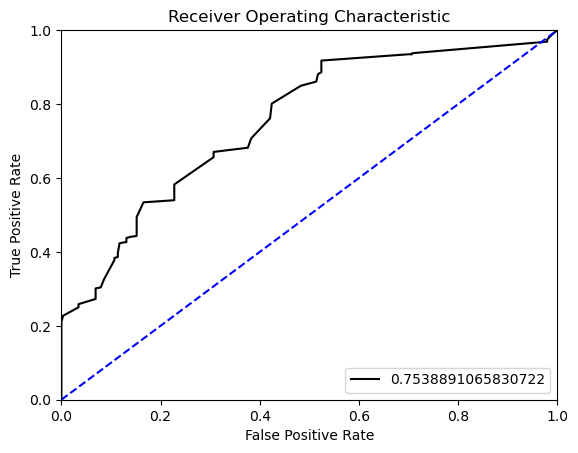

In [51]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'black', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

# models------------- [dt,rf,et,knn,logreg]

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
 
# first, initialize the classificators
dt= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
rf= RandomForestClassifier(n_estimators=100, random_state=10)
et=ExtraTreesClassifier(n_estimators=100,random_state=10, bootstrap=True,n_jobs=-1)
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
#svm= SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)#c= 1 par 87 something tha but c=90 kiya to 98.55 ho gaya
logreg=LogisticRegression(multi_class="multinomial",random_state=10)

In [53]:
models= [dt,rf,et,knn,logreg]

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[240  50]
 [ 96 256]]
The accuracy of the  DecisionTreeClassifier  model is  77.25856697819314
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       290
           1       0.84      0.73      0.78       352

    accuracy                           0.77       642
   macro avg       0.78      0.78      0.77       642
weighted avg       0.78      0.77      0.77       642



[[240  50]
 [ 93 259]]
The accuracy of the  RandomForestClassifier  model is  77.72585669781932
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       290
           1       0.84      0.74      0.78       352

    accuracy                           0.78       642
   macro avg       0.78      0.78      0.78       642
weighted avg       0.79      0.78      0.78       642



[[240  50]
 [ 93 259]]
The accuracy of the  ExtraTreesClassifier  model is  77.72585669781932
Classifi

# feature selection with extraa trees

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
 
model_EXT=ExtraTreesClassifier( random_state=10, bootstrap=True)          # fix parameter should be passed here
## parameter for trial and error should be passed here 
 
parameter_space = {
    'n_estimators':[100,300,500,1000],                             #np.arange(100, 1001,50),
    'max_depth':[10,15, 8, 12],
    'min_samples_leaf':[3,4,5,6,7]
    }
from sklearn.model_selection import GridSearchCV                        ## randomizedSearchCV bhi use kr skte h grid ke jagah 
clf = GridSearchCV(model_EXT, parameter_space, n_jobs=-1, cv=5) 

In [56]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(bootstrap=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 8, 12],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 300, 500, 1000]})

In [57]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 1000}


In [58]:
clf.best_score_

0.7906354515050167

In [59]:
Y_pred=clf.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
# confusion matrix 

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

[[240  50]
 [ 87 265]]
0.7866043613707165
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       290
           1       0.84      0.75      0.79       352

    accuracy                           0.79       642
   macro avg       0.79      0.79      0.79       642
weighted avg       0.79      0.79      0.79       642



# Project end here 